In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# List contents of the path
path = '/content/drive/MyDrive/Colab Notebooks/'
print(os.listdir(path))

['Prediction_of_disease_symptoms_based_on_decision_tree.ipynb', 'practiceC!.ipynb', 'Untitled0.ipynb', '017553718.ipynb', 'Matrix_operations_017553718', 'Untitled4.ipynb', 'Copy of AI_paper_implementation.ipynb', 'hw2_017553718.ipynb', 'Untitled1.ipynb', 'fairness_income_modified.ipynb', 'fairness_income_final_optimized.ipynb', 'fairness_income_threshold_tuned.ipynb', 'music_recommender_sparse_svd.ipynb', 'hybrid_clean_preprocessing_rmse.ipynb', 'hybrid_blended_model_colab_safe.ipynb', 'Untitled', 'final_cf_recommender_colab.ipynb', 'disease_symptom_dataset.csv']


In [ ]:
disease_symptom = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/disease_symptom_dataset.csv', sep=',')
disease_symptom.head()

,Fever,Cough,Fatigue,Headache,Nausea,SoreThroat,RunnyNose,BodyPain,Sneezing,Disease
0,0,0,1,0,0,0,0,0,1,Flu
1,0,0,0,0,0,0,1,0,1,Allergy
2,1,0,0,1,1,1,0,0,1,Flu
3,0,1,0,1,1,1,0,1,0,Migraine
4,1,0,1,1,0,0,0,0,1,Flu


In [ ]:
disease_symptom.shape

(1500, 10)

In [ ]:
disease_symptom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fever       1500 non-null   int64 
 1   Cough       1500 non-null   int64 
 2   Fatigue     1500 non-null   int64 
 3   Headache    1500 non-null   int64 
 4   Nausea      1500 non-null   int64 
 5   SoreThroat  1500 non-null   int64 
 6   RunnyNose   1500 non-null   int64 
 7   BodyPain    1500 non-null   int64 
 8   Sneezing    1500 non-null   int64 
 9   Disease     1500 non-null   object
dtypes: int64(9), object(1)
memory usage: 117.3+ KB


In [ ]:
disease_symptom.describe()

,Fever,Cough,Fatigue,Headache,Nausea,SoreThroat,RunnyNose,BodyPain,Sneezing
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.496000,0.498000,0.506667,0.509333,0.504000,0.520667,0.520000,0.494667,0.498000
std,0.500151,0.500163,0.500122,0.500080,0.500151,0.499739,0.499766,0.500138,0.500163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
disease_symptom.isnull().sum()

,0
Fever,0
Cough,0
Fatigue,0
Headache,0
Nausea,0
SoreThroat,0
RunnyNose,0
BodyPain,0
Sneezing,0
Disease,0


In [ ]:
disease_symptom[disease_symptom.duplicated()]
#there are 808 rows in the dataframe are duplicated

,Fever,Cough,Fatigue,Headache,Nausea,SoreThroat,RunnyNose,BodyPain,Sneezing,Disease
27,0,0,1,0,0,0,1,0,1,Allergy
28,0,0,1,1,0,1,1,0,1,Migraine
31,0,1,0,1,0,1,1,0,0,Migraine
57,0,0,0,1,0,0,1,1,1,Migraine
67,1,1,0,0,1,0,1,0,1,Cold
...,...,...,...,...,...,...,...,...,...,...
1492,0,0,1,0,0,0,1,0,1,Allergy
1493,1,1,1,1,1,1,1,0,0,Flu
1494,1,1,1,0,0,0,1,1,1,Flu
1498,1,0,1,0,0,1,1,1,1,Allergy


In [ ]:
disease_symptom.drop_duplicates(inplace=True)

In [ ]:
disease_symptom.shape
#After dropping the duplicates there are 692 rows with 10 columns.

(692, 10)

<ipython-input-12-453b62e3c6c7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette='mako')


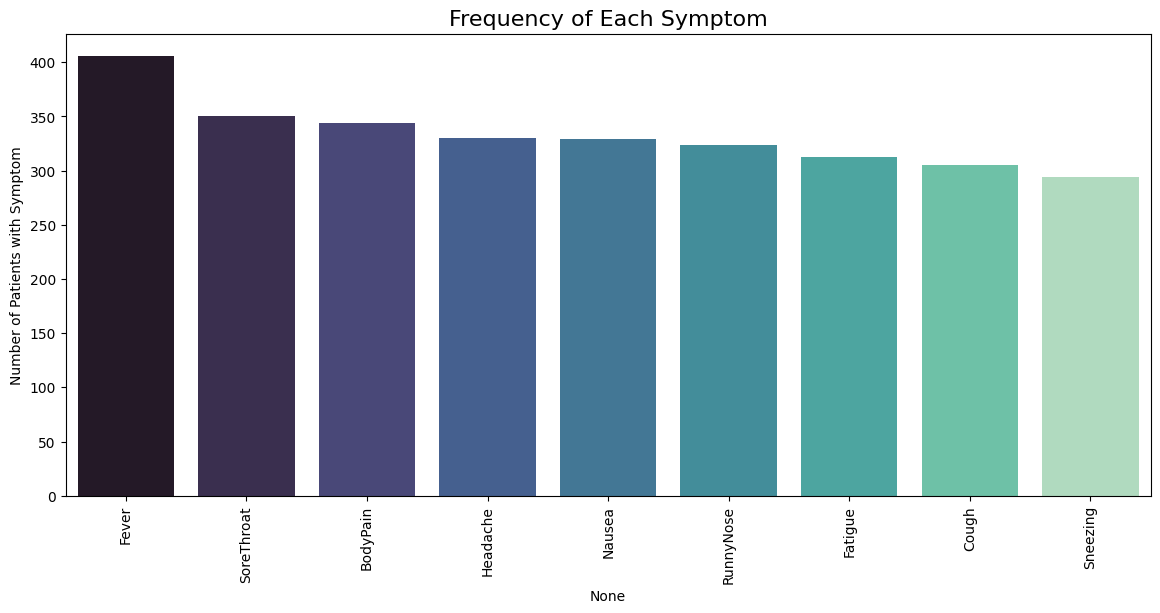

In [ ]:
symptom_cols = disease_symptom.columns.drop('Disease')

symptom_counts = disease_symptom[symptom_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette='mako')
plt.xticks(rotation=90)
plt.title('Frequency of Each Symptom', fontsize=16)
plt.ylabel('Number of Patients with Symptom')
plt.show()


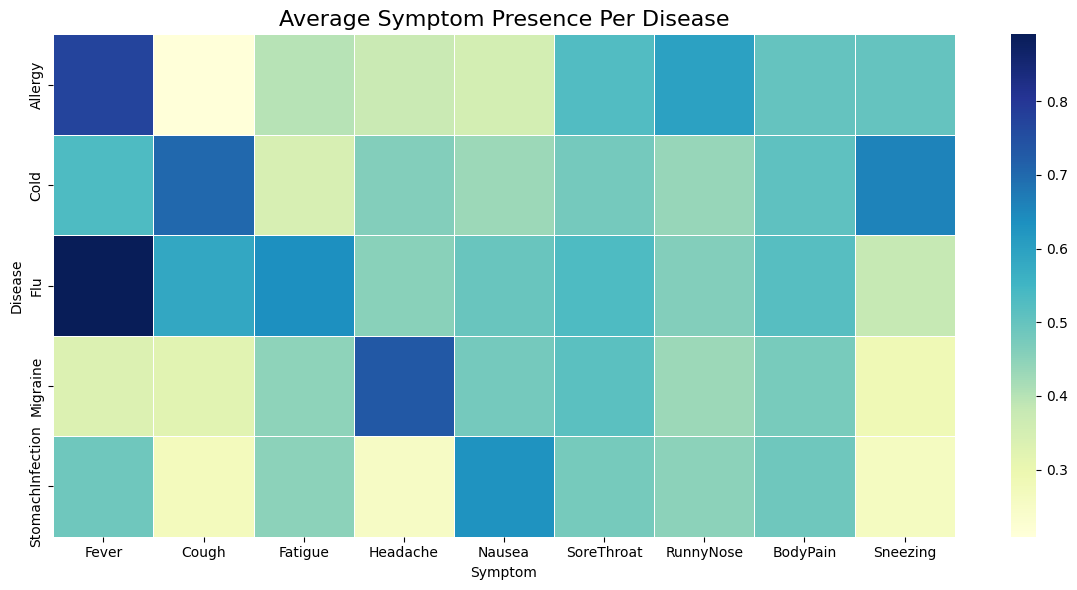

In [ ]:
symptom_disease_avg = disease_symptom.groupby('Disease')[symptom_cols].mean()

plt.figure(figsize=(12,6))
sns.heatmap(symptom_disease_avg, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Symptom Presence Per Disease', fontsize=16)
plt.xlabel('Symptom')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

In [ ]:
X = disease_symptom.drop('Disease', axis=1)  # Features (symptoms)
y = disease_symptom['Disease']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
print(y_encoded)

[2 0 2 3 2 3 1 1 4 2 3 3 4 1 0 1 1 4 0 1 3 0 1 2 4 3 1 3 3 3 1 0 4 3 2 1 1
 3 0 2 1 1 0 1 0 1 3 1 0 0 1 2 4 3 4 0 1 3 1 0 1 2 0 2 2 3 1 4 1 3 1 3 2 2
 1 2 4 3 0 0 2 3 2 2 3 3 4 4 1 1 1 1 4 3 1 4 1 4 2 4 3 3 2 0 2 1 0 3 1 0 4
 3 1 1 3 2 1 3 1 3 2 1 0 1 3 4 2 1 0 4 0 3 0 3 1 3 1 2 1 3 3 2 4 1 3 0 3 4
 4 0 3 3 2 0 4 0 3 4 1 4 3 1 0 3 1 0 1 3 3 3 3 1 2 1 3 3 4 2 4 3 3 1 0 4 0
 2 2 1 0 2 3 2 0 3 0 1 1 2 1 4 2 1 3 2 1 1 1 2 3 4 1 2 1 3 1 2 3 0 3 4 4 0
 0 0 3 2 3 1 3 1 4 2 2 4 3 2 0 2 0 2 1 2 4 1 0 4 2 3 3 0 4 2 3 1 4 2 0 2 3
 4 1 0 4 1 1 3 4 2 1 1 4 3 0 2 3 4 1 1 4 0 0 2 3 4 3 4 4 2 1 1 2 3 3 4 2 1
 3 2 4 1 2 1 1 0 1 1 1 0 0 2 2 2 3 0 1 1 2 1 4 3 2 4 1 0 4 3 1 0 1 2 1 2 1
 4 2 1 1 3 1 4 3 1 3 2 0 3 2 4 2 2 2 1 2 4 2 4 1 0 3 3 2 3 0 3 4 3 2 4 2 4
 4 0 2 2 3 3 3 2 4 4 3 1 3 1 0 4 3 2 0 3 0 4 3 1 1 0 2 1 4 0 3 4 0 1 2 2 1
 3 3 0 0 2 3 1 1 4 2 4 3 2 3 0 3 3 4 1 1 3 3 3 2 2 1 3 1 4 1 3 1 2 1 4 0 1
 4 1 4 2 0 0 2 0 0 4 3 4 3 3 1 1 1 2 1 0 0 4 1 4 1 1 0 0 3 2 0 1 4 3 1 2 1
 2 1 1 1 1 3 3 1 1 2 4 4 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [ ]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    class_weight='balanced',
    max_depth=4,              # Try different values like 5–10
    min_samples_split=7,     # Minimum rows needed to split a node
    random_state=42
)
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_split=7, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.4460431654676259
                  precision    recall  f1-score   support

         Allergy       0.29      0.71      0.42        28
            Cold       1.00      0.39      0.56        36
             Flu       1.00      0.29      0.45        24
        Migraine       1.00      0.43      0.60        30
StomachInfection       0.22      0.38      0.28        21

        accuracy                           0.45       139
       macro avg       0.70      0.44      0.46       139
    weighted avg       0.74      0.45      0.48       139



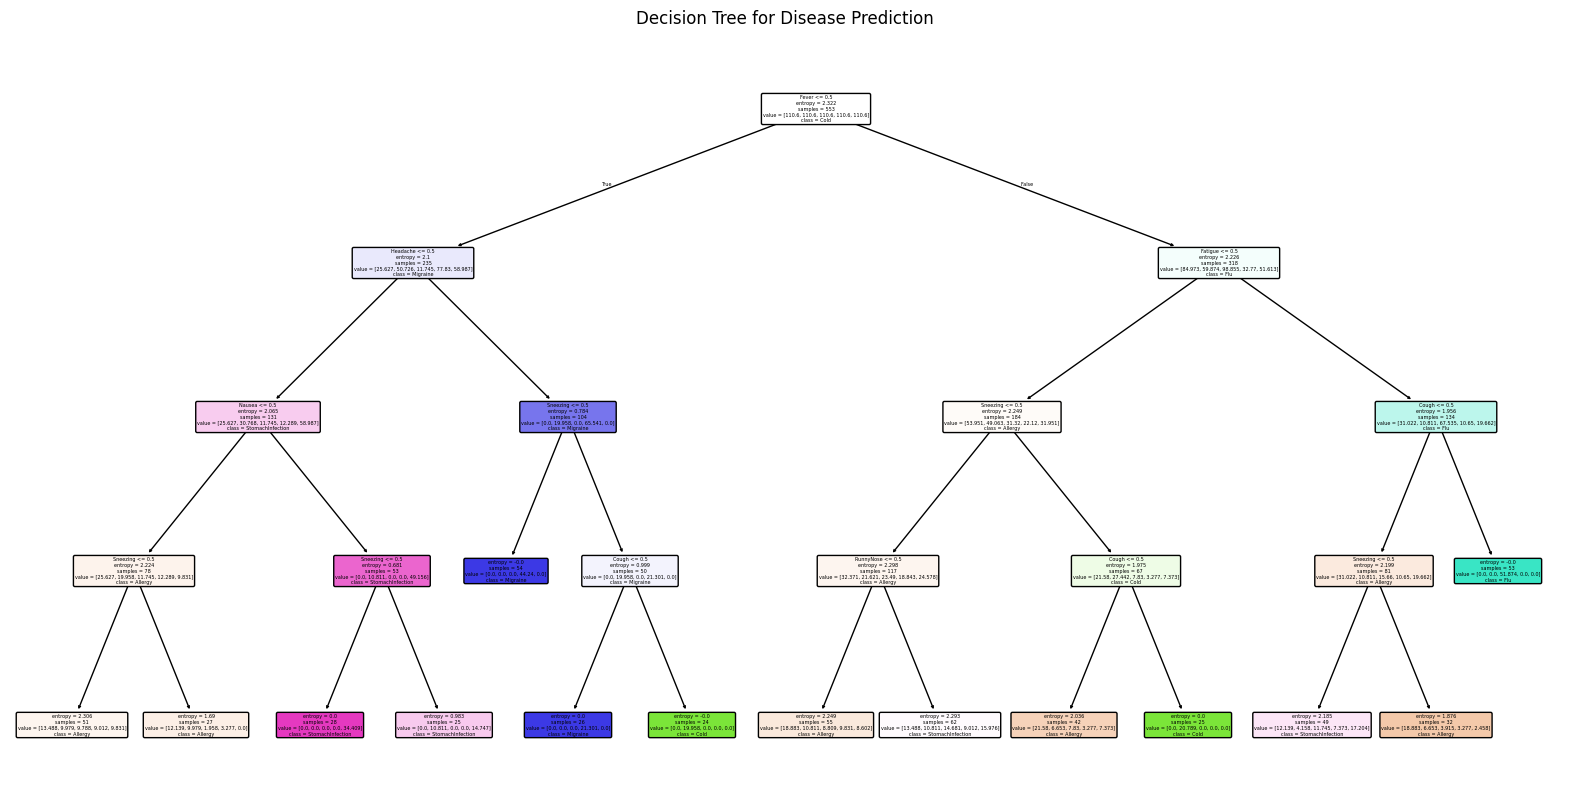

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree for Disease Prediction")
plt.show()
